# Automated Hate Speech Detection in Reddit Platform

## Data Preprocessing

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
from stop_words import get_stop_words
import demoji
import emoji

### Analyze the Dataset

In [2]:
df = pd.read_csv('Original_Reddit.csv')

In [3]:
df.head()

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,NaN,NaN
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,[1],"[""It's not right for anyone of any gender to b..."
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,"[2, 3]","[""You shouldn't be bringing up sensitive topic..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5020 non-null   object
 1   text             5020 non-null   object
 2   hate_speech_idx  3847 non-null   object
 3   response         3847 non-null   object
dtypes: object(4)
memory usage: 157.0+ KB


#### Each row of text contains more than 1 comment.

In [5]:
df['text'][17]

'1. Grammatical errors, overt racism, child prostitution.. It would appear we have a despicable moron on our hands. \n'

In [6]:
df['text'][1]

'1. > "y\'all hear sumn?"  by all means I live in a small town rn (for work). 5k people here, originally a mining community. No one is protesting here. Nobody mentioned the protest today. Nobody here cares, they\'re busy loving their family and working hard.  Thank god for the electoral college. Liberals think we don\'t matter. \n2. \t[removed]\n3. \t\tah a liberal has slipped in. you can tell because the first question asked was loaded and retarded.  >  What does "working hard" mean? Your political views get more validated by how much manual labour you put in?   where did I say that? and yes, of course you have no clue what "working hard" means. Few soyboys do.  > Based on your comment regarding the EC I guess you don\'t really think that 2 mil majority of people who voted for Hillary don\'t really matter.  I shouldn\'t have to explain to you the point of the EC. If you want to talk to someone who is more patient with you than I am, you can check out AskThe_Donald. \n'

#### The corresponding hate speech index determines which comments are categorized as hate speech.

In [7]:
df['hate_speech_idx'][17]

nan

In [8]:
df['hate_speech_idx'][1]

'[3]'

#### Statistics

In [9]:
df['text'].describe()

count                   5020
unique                  5002
top       1. What a cunt. \n
freq                       4
Name: text, dtype: object

In [10]:
df['hate_speech_idx'].describe()

count     3847
unique     316
top        [1]
freq      1740
Name: hate_speech_idx, dtype: object

In [11]:
df.describe()

,id,text,hate_speech_idx,response
count,5020,5020,3847,3847
unique,5015,5002,316,3838
top,1. e9ai3dh\n,1. What a cunt. \n,[1],"[""You're disturbingly obsessed with women."", '..."
freq,2,4,1740,3


### Restructuring the Dataset

#### Restructuring the dataset to have individual rows for each comment from a post, tagging them with a 1 if they contain hate speech and 0 if not.

In [12]:
# Function to split comments and mark hate speech
def process_comments(row):
    # Using regex to find the pattern "index. comment"
    pattern = re.compile(r'(\d+)\.\s(.*?)(?=\d+\.\s|$)', re.DOTALL)
    matches = pattern.findall(row['text'])
    
    # Clean and split the hate_speech_idx column
    hate_indices = list(map(int, re.sub(r'[^0-9,]', '', row['hate_speech_idx']).split(','))) if pd.notna(row['hate_speech_idx']) else []
    
    processed_data = []
    
    for index, comment in matches:
        index = int(index)
        comment = comment.strip()
        is_hate_speech = 1 if index in hate_indices else 0
        processed_data.append([index, comment, is_hate_speech])
    
    return processed_data

processed_comments = df.apply(process_comments, axis=1)
processed_comments = [item for sublist in processed_comments for item in sublist]
new_df = pd.DataFrame(processed_comments, columns=['index','comment', 'hate_speech'])

In [13]:
new_df.to_csv('Restructure_Reddit.csv', index=False)
print("File Saved")

File Saved


### Import Restructured Dataset

In [14]:
df = pd.read_csv('Restructure_Reddit.csv')
print("Column names:", df.columns)

Column names: Index(['index', 'comment', 'hate_speech'], dtype='object')


In [15]:
df.head()

,index,comment,hate_speech
0,1,A subsection of retarded Hungarians? Ohh boy. ...,1
1,2,Hiii. Just got off work. 444 is mainly the typ...,0
2,3,wow i guess soyboys are the same in every country,0
3,4,Owen Benjamin's soyboy song goes for every cou...,0
4,1,"> ""y'all hear sumn?"" by all means I live in a...",0


In [16]:
df = df.drop(columns=['index'])

In [17]:
df.head()

,comment,hate_speech
0,A subsection of retarded Hungarians? Ohh boy. ...,1
1,Hiii. Just got off work. 444 is mainly the typ...,0
2,wow i guess soyboys are the same in every country,0
3,Owen Benjamin's soyboy song goes for every cou...,0
4,"> ""y'all hear sumn?"" by all means I live in a...",0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22841 entries, 0 to 22840
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comment      22757 non-null  object
 1   hate_speech  22841 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 357.0+ KB


In [19]:
df.describe()

,hate_speech
count,22841.000000
mean,0.231864
std,0.422032
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


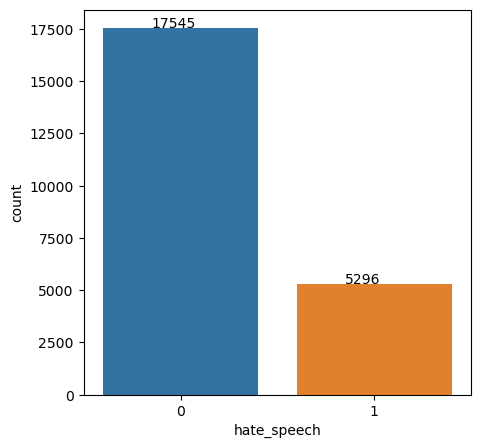

In [20]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['hate_speech'],data=df,order=df['hate_speech'].value_counts().index)
for p,label in zip(ax.patches,df['hate_speech'].value_counts()):
    ax.annotate(label,(p.get_x()+0.25,p.get_height()+0.5))

### Data Cleaning

#### Remove NaN values and drop comments which are deleted or removed

In [21]:
size_col0 = len(df['comment'])
size_col1 = df['comment'].count()
size_col2 = len(df['hate_speech'])
size_col3 = df['hate_speech'].count()
print("Comment Length: ", size_col0)
print("Comment Count: ", size_col1)
print("Hate Speech Length: ", size_col2)
print("Hate Speech Count: ",size_col3)

Comment Length:  22841
Comment Count:  22757
Hate Speech Length:  22841
Hate Speech Count:  22841


In [22]:
df = df.dropna().loc[(df['comment'] != '[deleted]') & (df['comment'] != '[removed]')]

In [23]:
size_col0 = len(df['comment'])
size_col1 = df['comment'].count()
size_col2 = len(df['hate_speech'])
size_col3 = df['hate_speech'].count()
print("Comment Length: ", size_col0)
print("Comment Count: ", size_col1)
print("Hate Speech Length: ", size_col2)
print("Hate Speech Count: ",size_col3)

Comment Length:  22246
Comment Count:  22246
Hate Speech Length:  22246
Hate Speech Count:  22246


### Convert to lowercase 


#### In tokenization a sentence word by word, same word represented in upper and lower case notations are identified as different words. For example, ‘Basic’ and ‘basic’ are considered different but they both are same,because python is case-sensitive,it adds complexity to model, to simplify it we do lowercasing.

In [24]:
df['comment'][1]

'Hiii. Just got off work. 444 is mainly the typa guys you imagine writing for US stupid sites, but basically they just try to fit in with the Western European and US big city hipsters.   Rich kids from Budapest who feel they are brave journalistic heroes.'

In [25]:
df['comment']=df['comment'].str.lower()
df.head()

,comment,hate_speech
0,a subsection of retarded hungarians? ohh boy. ...,1
1,hiii. just got off work. 444 is mainly the typ...,0
2,wow i guess soyboys are the same in every country,0
3,owen benjamin's soyboy song goes for every cou...,0
4,"> ""y'all hear sumn?"" by all means i live in a...",0


In [26]:
df['comment'][1]

'hiii. just got off work. 444 is mainly the typa guys you imagine writing for us stupid sites, but basically they just try to fit in with the western european and us big city hipsters.   rich kids from budapest who feel they are brave journalistic heroes.'

### Remove Extra Spaces

#### While analyzing text data for classification or other types of analysis, it's essential to ensure the text is clean and well-formatted. Extra spaces, whether between words or at the beginning and end of the text, can lead to inconsistencies and affect the performance of text processing algorithms. Removing these extra spaces helps standardize the text, making it more suitable for analysis.

In [27]:
df['comment'][1]

'hiii. just got off work. 444 is mainly the typa guys you imagine writing for us stupid sites, but basically they just try to fit in with the western european and us big city hipsters.   rich kids from budapest who feel they are brave journalistic heroes.'

In [28]:
def clean_spaces(text):
    if isinstance(text, str):
        # Remove multiple consecutive spaces and trim leading/trailing spaces
        text = ' '.join(text.split())
    return text

df['comment'] = df['comment'].apply(clean_spaces)
df.head()

,comment,hate_speech
0,a subsection of retarded hungarians? ohh boy. ...,1
1,hiii. just got off work. 444 is mainly the typ...,0
2,wow i guess soyboys are the same in every country,0
3,owen benjamin's soyboy song goes for every cou...,0
4,"> ""y'all hear sumn?"" by all means i live in a ...",0


In [29]:
df['comment'][1]

'hiii. just got off work. 444 is mainly the typa guys you imagine writing for us stupid sites, but basically they just try to fit in with the western european and us big city hipsters. rich kids from budapest who feel they are brave journalistic heroes.'

### Removing HTML Tags 

#### Removing unwanted data from the text, let’s take the case of scraping data from web, where we get html tags which are unnecessary for the data,those should be removed.

In [30]:
def remove_html_tags(text):
    if isinstance(text, float) or text is None:  # Check for float or None and convert to empty string
        text = ''
    pattern = re.compile(r'<.*?>')
    return pattern.sub('', text)

df['comment'] = df['comment'].astype(str)
df['comment'] = df['comment'].apply(remove_html_tags)
df.head()

,comment,hate_speech
0,a subsection of retarded hungarians? ohh boy. ...,1
1,hiii. just got off work. 444 is mainly the typ...,0
2,wow i guess soyboys are the same in every country,0
3,owen benjamin's soyboy song goes for every cou...,0
4,"> ""y'all hear sumn?"" by all means i live in a ...",0


### Removing URL

In [31]:
def remove_url(text):
    pattern=re.compile(r'https?://\s+|www.\.\S+')
    return pattern.sub(r'',text)

df['comment']=df['comment'].apply(remove_url)
df.head()

,comment,hate_speech
0,a subsection of retarded hungarians? ohh boy. ...,1
1,hiii. just got off work. 444 is mainly the typ...,0
2,wow i guess soyboys are the same in every country,0
3,owen benjamin's soyboy song goes for every cou...,0
4,"> ""y'all hear sumn?"" by all means i live in a ...",0


### Stop Words Removal 

#### Words which help in sentence formation, but does not aid any meaning to the sentence like ‘a’, ‘an’, ‘the’, ‘is’ and so on.

In [32]:
df['comment'][1]

'hiii. just got off work. 444 is mainly the typa guys you imagine writing for us stupid sites, but basically they just try to fit in with the western european and us big city hipsters. rich kids from budapest who feel they are brave journalistic heroes.'

In [33]:
stop_words = get_stop_words('en')
def stop_words_removal(text):
    new_text=[]
    for word in text.split():
        if word in get_stop_words('en'):
            new_text.append('')
        else:
            new_text.append(word)
    return ' '.join(new_text)

df['comment']=df['comment'].apply(stop_words_removal)
df.head()

,comment,hate_speech
0,subsection retarded hungarians? ohh boy. bra...,1
1,hiii. just got work. 444 mainly typa guys ...,0
2,wow guess soyboys every country,0
3,owen benjamin's soyboy song goes every countr...,0
4,"> ""y'all hear sumn?"" means live small tow...",0


In [34]:
df['comment'][1]

'hiii. just got  work. 444  mainly  typa guys  imagine writing  us stupid sites,  basically  just try  fit    western european  us big city hipsters. rich kids  budapest  feel   brave journalistic heroes.'

### Chat Word Treatment 

#### Words like ROFL,LMAO,FYI,GD,ASAP, are found in chat messages of many social media platforms like WhatsApp, Instagram, Twitter. While summarizing the text, to understand the meaning of the word, these short words should be replaced with long forms. 

In [35]:
chat_words={'AFAIK': 'As Far As I Know',
'AFK':'Away From Keyboard',
'ASAP':'As Soon As Possible',
'ATK':'At The Keyboard',
'ATM':'At The Moment',
'A3':'Anytime, Anywhere, Anyplace',
'BAK':'Back At Keyboard',
'BBL': 'Be Back Later',
'BBS': 'Be Back Soon',
'BFN': 'Bye For Now',
'B4N': 'Bye For Now',
'BRB': 'Be Right Back',
'BRT': 'Be Right There',
'BTW': 'By The Way',
'B4': 'Before',
'B4N': 'Bye For Now',
'CU':'See You',
'CUL8R':'See You Later',
'CYA': 'See You',
'FAQ': 'Frequently Asked Questions',
'FC': 'Fingers Crossed',
'FWIW': 'For What Its Worth',
'FYI': 'For Your Information',
'GAL': 'Get A Life',
'GG': 'Good Game',
'GN' : 'Good Night',
'GMTA': 'Great Minds Think Alike',
'GR8': 'Great!',
'G9': 'Genius',
'IC': 'I See',
'ICQ': 'I Seek you (also a chat program)',
'ILU': 'I Love You',
'IMHO': 'In My Honest/Humble Opinion',
'IMO':'In My Opinion',
'IOW':'In Other Words',
'IRL': 'In Real Life',
'KISS':'Keep It Simple, Stupid',
'LDR':'Long Distance Relationship',
'LMAO':'Laugh My A.. Off',
'LOL':'Laughing Out Loud',
'LTNS': 'Long Time No See',
'L8R': 'Later',
'MTE': 'My Thoughts Exactly',
'M8': 'Mate',
'NRN': 'No Reply Necessary',
'OIC':'Oh I See',
'PITA':'Pain In The A..',
'PRT': 'Party',
'PRW':'Parents Are Watching',
'QPSA':	'Que Pasa?',
'ROFL':'Rolling On The Floor Laughing',
'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
'ROTFLMAO':'Rolling On The Floor Laughing My A.. Off',
'SK8':'Skate',
'STATS':'Your sex and age',
'ASL':'Age, Sex, Location',
'THX':'Thank You',
'TTFN':'Ta-Ta For Now!',
'TTYL':'Talk To You Later',
'U':'You',
'U2':'You Too',
'U4E':'Yours For Ever',
'WB':'Welcome Back',
'WTF':'What The F...',
'WTG':'Way To Go!',
'WUF':'Where Are You From?',
'W8':'Wait...',
'7K':'Sick'}

In [36]:
df['comment'][16]

' apparently  don’t *study*    either.    had, you’d know   much-anticipated modern reformation  islam will never actually happen.  i’m wasting  time.   think marxism   positive influence   christian west,   retarded. last  checked, atheists still need food lol'

In [37]:
def chat_word(text):
    new_text=[]
    for word in text.split():
        if word.upper() in chat_words:
            new_text.append(chat_words[word.upper()])
        else:
            new_text.append(word)
            
    return " ".join(new_text)

df['comment']=df['comment'].apply(chat_word)
df.head()

,comment,hate_speech
0,subsection retarded hungarians? ohh boy. brace...,1
1,hiii. just got work. 444 mainly typa guys imag...,0
2,wow guess soyboys every country,0
3,owen benjamin's soyboy song goes every country...,0
4,"> ""y'all hear sumn?"" means live small town rn ...",0


In [38]:
df['comment'][16]

'apparently don’t *study* either. had, you’d know much-anticipated modern reformation islam will never actually happen. i’m wasting time. think marxism positive influence christian west, retarded. last checked, atheists still need food Laughing Out Loud'

### Handling Emoji’s 

#### While analyzing chatting messages, for text classification or sentiment analysis, emoji’s particularly have a meaning, we can replace emoji expression with their corresponding meaning. 

In [39]:
df['comment'][9]

'“harvard working inclusive.” “oh, they’re accepting students next year?” “no, meant they’re literally racist asians.” 👌'

In [40]:
def convert_emojis(text): 
    text=emoji.demojize(text,delimiters=("",""))
    return text

df['comment']=df['comment'].apply(convert_emojis)
df.head()

,comment,hate_speech
0,subsection retarded hungarians? ohh boy. brace...,1
1,hiii. just got work. 444 mainly typa guys imag...,0
2,wow guess soyboys every country,0
3,owen benjamin's soyboy song goes every country...,0
4,"> ""y'all hear sumn?"" means live small town rn ...",0


In [41]:
df['comment'][9]

'“harvard working inclusive.” “oh, they’re accepting students next year?” “no, meant they’re literally racist asians.” OK_hand'

### Handling Special Numbers

#### While analyzing text data for classification or other types of analysis, special numbers within the text can hold significant meaning. These numbers can be replaced with their corresponding meanings to provide context.

In [42]:
number_meanings = {
    '111': 'Alignment and manifestation',
    '1111': 'New beginnings and unity',
    '222': 'Balance and harmony',
    '333': 'Protection and encouragement',
    '444': 'Foundation and grounding',
    '555': 'Change and transformation',
    '666': 'Reflection and personal development',
    '777': 'Spiritual growth and good fortune',
    '888': 'Abundance and success',
    '999': 'Completion and closure',
    '1010': 'Personal development and growth',
    '1212': 'Spiritual awakening and higher consciousness',
    '1234': 'Progress and moving forward',
    '2222': 'Peace and balance in life',
    '3333': 'Divine protection and guidance',
    '4444': 'Strong foundation and support',
    '5555': 'Major life changes',
    '6666': 'Reflecting on past choices',
    '7777': 'Luck and spiritual awareness',
    '8888': 'Financial abundance and prosperity',
    '9999': 'Endings leading to new beginnings',
    '1001': 'Self-improvement and new perspectives',
    '1101': 'Opening new doors and opportunities',
    '1211': 'Embracing new phases in life',
    '1233': 'Balanced progress and harmony',
    '1441': 'Foundation and new opportunities',
    '1515': 'Personal growth and freedom',
    '1616': 'Stability and inner strength',
    '1717': 'Awakening and self-awareness',
    '1818': 'Financial success and independence',
    '1919': 'Completion of cycles and new beginnings',
    '2020': 'Vision and clarity',
    '2121': 'Positive change and new opportunities',
    '2323': 'Creativity and self-expression',
    '2424': 'Building strong foundations',
    '2525': 'Adaptability and positive change',
    '2626': 'Nurturing and care for loved ones',
    '2727': 'Spiritual awareness and inner wisdom',
    '2828': 'Abundance and prosperity',
    '2929': 'Transformation and new phases',
    '3030': 'Creativity and communication',
    '3131': 'Optimism and positive energy',
    '3232': 'Faith and trust in the universe',
    '3434': 'Stability and determination',
    '3535': 'Personal freedom and individuality',
    '3636': 'Nurturing and compassion',
    '3737': 'Spiritual growth and awareness',
    '3838': 'Ab'}


In [43]:
df['comment'][1]

'hiii. just got work. 444 mainly typa guys imagine writing us stupid sites, basically just try fit western european us big city hipsters. rich kids budapest feel brave journalistic heroes.'

In [44]:
def replace_numbers(text):
    new_text = []
    if isinstance(text, str):
        for word in text.split():
            if word.isdigit() and word in number_meanings:
                new_text.append(number_meanings[word])
            elif word.isdigit():
                continue  # Skip the word if it is a number and not in number_meanings
            else:
                new_text.append(word)
        text = " ".join(new_text).strip()
    return text

df['comment'] = df['comment'].apply(replace_numbers)
df.head()

,comment,hate_speech
0,subsection retarded hungarians? ohh boy. brace...,1
1,hiii. just got work. Foundation and grounding ...,0
2,wow guess soyboys every country,0
3,owen benjamin's soyboy song goes every country...,0
4,"> ""y'all hear sumn?"" means live small town rn ...",0


In [45]:
df['comment'][1]

'hiii. just got work. Foundation and grounding mainly typa guys imagine writing us stupid sites, basically just try fit western european us big city hipsters. rich kids budapest feel brave journalistic heroes.'

### Removing Punctuations 

#### When we are tokenizing the sentences, punctuations become different words. For example, "Hello! how are you?" is tokenized as [Hello , !, how ,are, you,?]. Here punctuation marks are taken as different words. It adds complexity to the model by performing more operations to the code and punctuations does not attribute any meaning to the sentence.

In [46]:
df['comment'][1]

'hiii. just got work. Foundation and grounding mainly typa guys imagine writing us stupid sites, basically just try fit western european us big city hipsters. rich kids budapest feel brave journalistic heroes.'

In [47]:
print(string.punctuation)
exclude=string.punctuation

def remove_punctuation(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

df['comment']=df['comment'].apply(remove_punctuation)
df.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,comment,hate_speech
0,subsection retarded hungarians ohh boy brace l...,1
1,hiii just got work Foundation and grounding ma...,0
2,wow guess soyboys every country,0
3,owen benjamins soyboy song goes every country ...,0
4,yall hear sumn means live small town rn for w...,0


In [48]:
df['comment'][1]

'hiii just got work Foundation and grounding mainly typa guys imagine writing us stupid sites basically just try fit western european us big city hipsters rich kids budapest feel brave journalistic heroes'

#### Check for null values for preprocessing the data

In [49]:
print(df.isnull().sum())

comment        0
hate_speech    0
dtype: int64


#### Save the Preprocessed Dataset

In [50]:
df.to_csv('Reddit_Preprocessed.csv', index=False)
print("File saved")

File saved


## Tokenization

In [51]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [52]:
df= pd.read_csv('Reddit_Preprocessed.csv')

In [53]:
print(df.isnull().sum())

comment        35
hate_speech     0
dtype: int64


In [54]:
df.dropna(inplace=True)

In [55]:
print(df.isnull().sum())

comment        0
hate_speech    0
dtype: int64


In [56]:
df['words'] = df['comment'].apply(lambda x: word_tokenize(x))

In [57]:
df.head()

,comment,hate_speech,words
0,subsection retarded hungarians ohh boy brace l...,1,"[subsection, retarded, hungarians, ohh, boy, b..."
1,hiii just got work Foundation and grounding ma...,0,"[hiii, just, got, work, Foundation, and, groun..."
2,wow guess soyboys every country,0,"[wow, guess, soyboys, every, country]"
3,owen benjamins soyboy song goes every country ...,0,"[owen, benjamins, soyboy, song, goes, every, c..."
4,yall hear sumn means live small town rn for w...,0,"[yall, hear, sumn, means, live, small, town, r..."


In [58]:
lemmatizer = WordNetLemmatizer()
df['lemmatized_comment'] = df['words'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in x]))

In [59]:
df.head()

,comment,hate_speech,words,lemmatized_comment
0,subsection retarded hungarians ohh boy brace l...,1,"[subsection, retarded, hungarians, ohh, boy, b...",subsection retard hungarians ohh boy brace liv...
1,hiii just got work Foundation and grounding ma...,0,"[hiii, just, got, work, Foundation, and, groun...",hiii just get work Foundation and ground mainl...
2,wow guess soyboys every country,0,"[wow, guess, soyboys, every, country]",wow guess soyboys every country
3,owen benjamins soyboy song goes every country ...,0,"[owen, benjamins, soyboy, song, goes, every, c...",owen benjamins soyboy song go every country amaze
4,yall hear sumn means live small town rn for w...,0,"[yall, hear, sumn, means, live, small, town, r...",yall hear sumn mean live small town rn for wor...


#### Save the Tokenized Dataset

In [60]:
df.to_csv('Reddit_Tokenization.csv', index=False)
print("File saved")

File saved


## Encoding

In [61]:
import pandas as pd
import fasttext
import numpy as np

In [62]:
df = pd.read_csv('Reddit_Tokenization.csv')
df.head()

,comment,hate_speech,words,lemmatized_comment
0,subsection retarded hungarians ohh boy brace l...,1,"['subsection', 'retarded', 'hungarians', 'ohh'...",subsection retard hungarians ohh boy brace liv...
1,hiii just got work Foundation and grounding ma...,0,"['hiii', 'just', 'got', 'work', 'Foundation', ...",hiii just get work Foundation and ground mainl...
2,wow guess soyboys every country,0,"['wow', 'guess', 'soyboys', 'every', 'country']",wow guess soyboys every country
3,owen benjamins soyboy song goes every country ...,0,"['owen', 'benjamins', 'soyboy', 'song', 'goes'...",owen benjamins soyboy song go every country amaze
4,yall hear sumn means live small town rn for w...,0,"['yall', 'hear', 'sumn', 'means', 'live', 'sma...",yall hear sumn mean live small town rn for wor...


In [63]:
df['tokens'] = df['lemmatized_comment'].apply(lambda x: x.split())

In [64]:
# Load a pre-trained FastText model (English)
model = fasttext.load_model('cc.en.300.bin')

In [65]:
# Get word vectors for each token
df['word_vectors'] = df['tokens'].apply(lambda tokens: [model.get_word_vector(token) for token in tokens])

In [66]:
# Function to average word vectors
def average_word_vectors(word_vectors):
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.get_dimension())

In [67]:
# Aggregate word vectors for each document
df['document_vector'] = df['word_vectors'].apply(average_word_vectors)
print(df[['comment', 'document_vector']])

                                                 comment  \
0      subsection retarded hungarians ohh boy brace l...   
1      hiii just got work Foundation and grounding ma...   
2                        wow guess soyboys every country   
3      owen benjamins soyboy song goes every country ...   
4       yall hear sumn means live small town rn for w...   
...                                                  ...   
22206          op stop faggot post videos next time hard   
22207  minute long video top hate champagne goes need...   
22208  clue whos ecelebs are point time  need get alo...   
22209                        didn’t insult you insult me   
22210                                         living lie   

                                         document_vector  
0      [0.014043219, -0.01809359, 0.017145459, 0.0806...  
1      [-0.0030388932, -0.035133556, 0.020659983, 0.0...  
2      [0.017362628, 0.005587179, 0.0297773, 0.109146...  
3      [0.018085241, 0.0011954829, 2.895947

#### Flatten document vectors

In [68]:
df['document_vector_flat'] = df['document_vector'].apply(lambda vec: ','.join(map(str, vec)))
print(df[['comment', 'document_vector_flat']].head())

                                             comment  \
0  subsection retarded hungarians ohh boy brace l...   
1  hiii just got work Foundation and grounding ma...   
2                    wow guess soyboys every country   
3  owen benjamins soyboy song goes every country ...   
4   yall hear sumn means live small town rn for w...   

                                document_vector_flat  
0  0.014043219,-0.01809359,0.017145459,0.08062436...  
1  -0.0030388932,-0.035133556,0.020659983,0.07383...  
2  0.017362628,0.005587179,0.0297773,0.109146975,...  
3  0.018085241,0.0011954829,2.8959475e-05,0.07601...  
4  0.023993038,-0.00060867134,0.005239945,0.05989...  


#### Save the Encoded Dataset

In [69]:
df.to_csv('Reddit_Encoded.csv', index=False, columns=['comment', 'hate_speech', 'lemmatized_comment', 'document_vector_flat'])
print("File saved")

File saved


## Machine Learning Model

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [71]:
df = pd.read_csv('Reddit_Encoded.csv')
print(df.head())

                                             comment  hate_speech  \
0  subsection retarded hungarians ohh boy brace l...            1   
1  hiii just got work Foundation and grounding ma...            0   
2                    wow guess soyboys every country            0   
3  owen benjamins soyboy song goes every country ...            0   
4   yall hear sumn means live small town rn for w...            0   

                                  lemmatized_comment  \
0  subsection retard hungarians ohh boy brace liv...   
1  hiii just get work Foundation and ground mainl...   
2                    wow guess soyboys every country   
3  owen benjamins soyboy song go every country amaze   
4  yall hear sumn mean live small town rn for wor...   

                                document_vector_flat  
0  0.014043219,-0.01809359,0.017145459,0.08062436...  
1  -0.0030388932,-0.035133556,0.020659983,0.07383...  
2  0.017362628,0.005587179,0.0297773,0.109146975,...  
3  0.018085241,0.0011954829,

In [72]:
# Convert the document vectors from their string representation back into numerical form
df['document_vector'] = df['document_vector_flat'].apply(lambda x: np.fromstring(x, sep=','))

# Ensure the conversion was successful
print(df['document_vector'].head())

0    [0.014043219, -0.01809359, 0.017145459, 0.0806...
1    [-0.0030388932, -0.035133556, 0.020659983, 0.0...
2    [0.017362628, 0.005587179, 0.0297773, 0.109146...
3    [0.018085241, 0.0011954829, 2.8959475e-05, 0.0...
4    [0.023993038, -0.00060867134, 0.005239945, 0.0...
Name: document_vector, dtype: object


In [73]:
# Extract features (document vectors) and labels (hate speech)
X = np.array(df['document_vector'].tolist())
y = df['hate_speech']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [75]:
# Initialize the SVM
model = SVC(kernel='rbf', gamma='scale', random_state=42)

# Train the classifier
model.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [76]:
# Make predictions
y_pred = model.predict(X_test)

In [77]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.61
Recall: 0.79
F1-Score: 0.69


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3369
           1       0.61      0.79      0.69      1074

    accuracy                           0.83      4443
   macro avg       0.77      0.81      0.78      4443
weighted avg       0.85      0.83      0.83      4443



### HyperParameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': ['scale', 'auto'],   # Kernel coefficient for 'rbf'
    'kernel': ['rbf']             # Kernel type
}

In [81]:
# Initialize the SVM
svc = SVC(random_state=42)

In [84]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, scoring='recall', verbose=1, n_jobs= -1)

# Perform GridSearchCV to find the best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters found:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.91


In [85]:
# Use the best model found by GridSearchCV
best_svc = grid_search.best_estimator_

# Train the best model on the full training data
best_svc.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_svc.predict(X_test)

In [86]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.69
Recall: 0.63
F1-Score: 0.66


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3369
           1       0.69      0.63      0.66      1074

    accuracy                           0.84      4443
   macro avg       0.79      0.77      0.78      4443
weighted avg       0.84      0.84      0.84      4443



In [89]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return accuracy

In [91]:
benchmark_score = evaluate_model(best_svc, X_train_resampled, y_train_resampled, X_test, y_test)

print(f"Benchmark score (SVM): {benchmark_score:.4f}")

Accuracy: 0.8289
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3369
           1       0.64      0.67      0.66      1074

    accuracy                           0.83      4443
   macro avg       0.77      0.78      0.77      4443
weighted avg       0.83      0.83      0.83      4443

Benchmark score (SVM): 0.8289
